# Get table of SRA accessions and metadata through query search 

#### FREE alternative to using Google BigQuery 
Though, it should be noted that the first 1TB of query on BigQuery is free per month, and the metadata for the SRA data on nih is 50GB.

pysradb has some useful functions for data from other sources, so this might be useful for non SRA data 

It also creates some pretty cool heatmaps of the data 

This script is inspired by https://github.com/saketkc/pysradb/blob/develop/notebooks/09.Query_Search.ipynb

# TODO:: finish notebook to obtain same outputs as the BigQuery notebook. 

In [ ]:
import pysradb.search as ps
help(ps.SraSearch)

Help on class SraSearch in module pysradb.search:

class SraSearch(QuerySearch)
 |  SraSearch(verbosity=2, return_max=20, query=None, accession=None, organism=None, layout=None, mbases=None, publication_date=None, platform=None, selection=None, source=None, strategy=None, title=None, suppress_validation=False)
 |  
 |  Subclass of QuerySearch that implements search by querying
 |  NCBI Entrez API
 |  
 |  Methods
 |  -------
 |  search()
 |      sends the user query via requests to NCBI Entrez API and returns
 |      search results as a pandas dataframe.
 |  
 |  show_result_statistics()
 |      Shows summary information about search results.
 |  
 |  visualise_results()
 |      Generate graphs that visualise the search results.
 |  
 |  get_plot_objects():
 |      Get the plot objects for plots generated.
 |  
 |  get_uids():
 |      Get NCBI uids retrieved during this search query.
 |  
 |  _format_query_string()
 |      formats the input user query into a string
 |  
 |  _format_req

/home/bioinf/miniconda3/envs/pysra/lib/python3.11/site-packages/pysradb/utils.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [ ]:
import pysradb.search as ps

# remove any previous search results
try:
    del instance
except:
    pass

# CCLE Bio Project Accession https://www.ncbi.nlm.nih.gov/bioproject/?term=PRJNA523380
# BioProjectAccession = "PRJNA523380"

# set properties of what we want to serach 
# see appendix below for indexes of each property
# note: setting max return to 3000, if less than 3000 are found, only those will be returned
instance = ps.SraSearch(verbosity=3, 
          return_max=5000, 
          query="PRJNA523380", 
        #   accession=None, 
        #   organism=None, 
        #   layout=None,
        #   mbases=None, 
        #   publication_date=None, 
        #   platform="illumina", 
        #   selection=None, 
        #   source="transcriptomic", 
        #   strategy="rna seq", 
        #   title=None, 
          suppress_validation=False)

In [ ]:
# start the search
# may take some time
instance.search()

100%|██████████| 4550/4550 [08:08<00:00,  9.31it/s]


In [ ]:
instance.show_result_statistics()


  Statistics for the search query:
  Number of unique studies: 1
  Number of unique experiments: 4550
  Number of unique runs: 4550
  Number of unique samples: 1065
  Mean base count of samples: 14786320761.447
  Median base count of samples: 2063504526.500
  Sample base count standard deviation: 31866975249.292
  Date range: 
	  2019-03:  4550

  Organisms: 
	  Homo sapiens:  4550

  Platform: 
	  ILLUMINA:  4550

  Library strategy: 
	  AMPLICON:  972
	  Bisulfite-Seq:  928
	  RNA-Seq:  1019
	  Targeted-Capture:  976
	  WGS:  329
	  WXS:  326

  Library source: 
	  GENOMIC:  3531
	  TRANSCRIPTOMIC:  1019

  Library selection: 
	  Hybrid Selection:  1302
	  PCR:  972
	  Reduced Representation:  928
	  cDNA:  1019
	  size fractionation:  329

  Library layout: 
	  PAIRED:  3622
	  SINGLE:  928




In [ ]:
import pandas as pd
# get the dataframe
df = instance.get_df()

# set dataframe column limit to unlimited
pd.set_option('display.max_columns', None)

df



,study_accession,experiment_accession,experiment_title,sample_taxon_id,sample_scientific_name,experiment_library_strategy,experiment_library_source,experiment_library_selection,sample_accession,sample_alias,experiment_instrument_model,pool_member_spots,run_1_size,run_1_accession,run_1_total_spots,run_1_total_bases,experiment_alias,experiment_design_description,experiment_external_id,experiment_library_name,experiment_platform,experiment_sample_descriptor_accession,library_layout,pool_external_id,pool_member_accession,pool_member_bases,pool_member_member_name,pool_member_organism,pool_member_sample_name,pool_member_sample_title,pool_member_tax_id,run_1_alias,run_1_assembly,run_1_base_A_count,run_1_base_C_count,run_1_base_G_count,run_1_base_N_count,run_1_base_T_count,run_1_cloudfile_1_filetype,run_1_cloudfile_1_location,run_1_cloudfile_1_provider,run_1_cloudfile_2_filetype,run_1_cloudfile_2_location,run_1_cloudfile_2_provider,run_1_cloudfile_3_filetype,run_1_cloudfile_3_location,run_1_cloudfile_3_provider,run_1_cloudfile_4_filetype,run_1_cloudfile_4_location,run_1_cloudfile_4_provider,run_1_cloudfile_5_filetype,run_1_cloudfile_5_location,run_1_cloudfile_5_provider,run_1_cloudfile_6_filetype,run_1_cloudfile_6_location,run_1_cloudfile_6_provider,run_1_cloudfile_7_filetype,run_1_cloudfile_7_location,run_1_cloudfile_7_provider,run_1_cluster_name,run_1_database_1,run_1_has_taxanalysis,run_1_is_public,run_1_load_done,run_1_published,run_1_srafile_1_alternative_1_access_type,run_1_srafile_1_alternative_1_free_egress,run_1_srafile_1_alternative_1_org,run_1_srafile_1_alternative_1_url,run_1_srafile_1_alternative_2_access_type,run_1_srafile_1_alternative_2_free_egress,run_1_srafile_1_alternative_2_org,run_1_srafile_1_alternative_2_url,run_1_srafile_1_cluster,run_1_srafile_1_date,run_1_srafile_1_filename,run_1_srafile_1_md5,run_1_srafile_1_semantic_name,run_1_srafile_1_size,run_1_srafile_1_sratoolkit,run_1_srafile_1_supertype,run_1_srafile_1_url,run_1_srafile_1_version,run_1_srafile_2_alternative_1_access_type,run_1_srafile_2_alternative_1_free_egress,run_1_srafile_2_alternative_1_org,run_1_srafile_2_alternative_1_url,run_1_srafile_2_alternative_2_access_type,run_1_srafile_2_alternative_2_free_egress,run_1_srafile_2_alternative_2_org,run_1_srafile_2_alternative_2_url,run_1_srafile_2_alternative_3_access_type,run_1_srafile_2_alternative_3_free_egress,run_1_srafile_2_alternative_3_org,run_1_srafile_2_alternative_3_url,run_1_srafile_2_cluster,run_1_srafile_2_date,run_1_srafile_2_filename,run_1_srafile_2_md5,run_1_srafile_2_semantic_name,run_1_srafile_2_size,run_1_srafile_2_sratoolkit,run_1_srafile_2_supertype,run_1_srafile_2_url,run_1_srafile_2_version,run_1_srafile_3_alternative_1_access_type,run_1_srafile_3_alternative_1_free_egress,run_1_srafile_3_alternative_1_org,run_1_srafile_3_alternative_1_url,run_1_srafile_3_alternative_2_access_type,run_1_srafile_3_alternative_2_free_egress,run_1_srafile_3_alternative_2_org,run_1_srafile_3_alternative_2_url,run_1_srafile_3_alternative_3_access_type,run_1_srafile_3_alternative_3_free_egress,run_1_srafile_3_alternative_3_org,run_1_srafile_3_alternative_3_url,run_1_srafile_3_alternative_4_access_type,run_1_srafile_3_alternative_4_free_egress,run_1_srafile_3_alternative_4_org,run_1_srafile_3_alternative_4_url,run_1_srafile_3_cluster,run_1_srafile_3_date,run_1_srafile_3_filename,run_1_srafile_3_md5,run_1_srafile_3_semantic_name,run_1_srafile_3_size,run_1_srafile_3_sratoolkit,run_1_srafile_3_supertype,run_1_srafile_3_url,run_1_srafile_3_version,run_1_static_data_available,run_1_total_base_count,run_1_total_base_cs_native,run_set_bases,run_set_bytes,run_set_runs,run_set_spots,sample_attributes_10_tag,sample_attributes_10_value,sample_attributes_11_tag,sample_attributes_11_value,sample_attributes_1_tag,sample_attributes_1_value,sample_attributes_2_tag,sample_attributes_2_value,sample_attributes_3_tag,sample_attributes_3_value,sample_attributes_4_tag,sample_attributes_4_value,sample_attributes_5_tag,sample_a

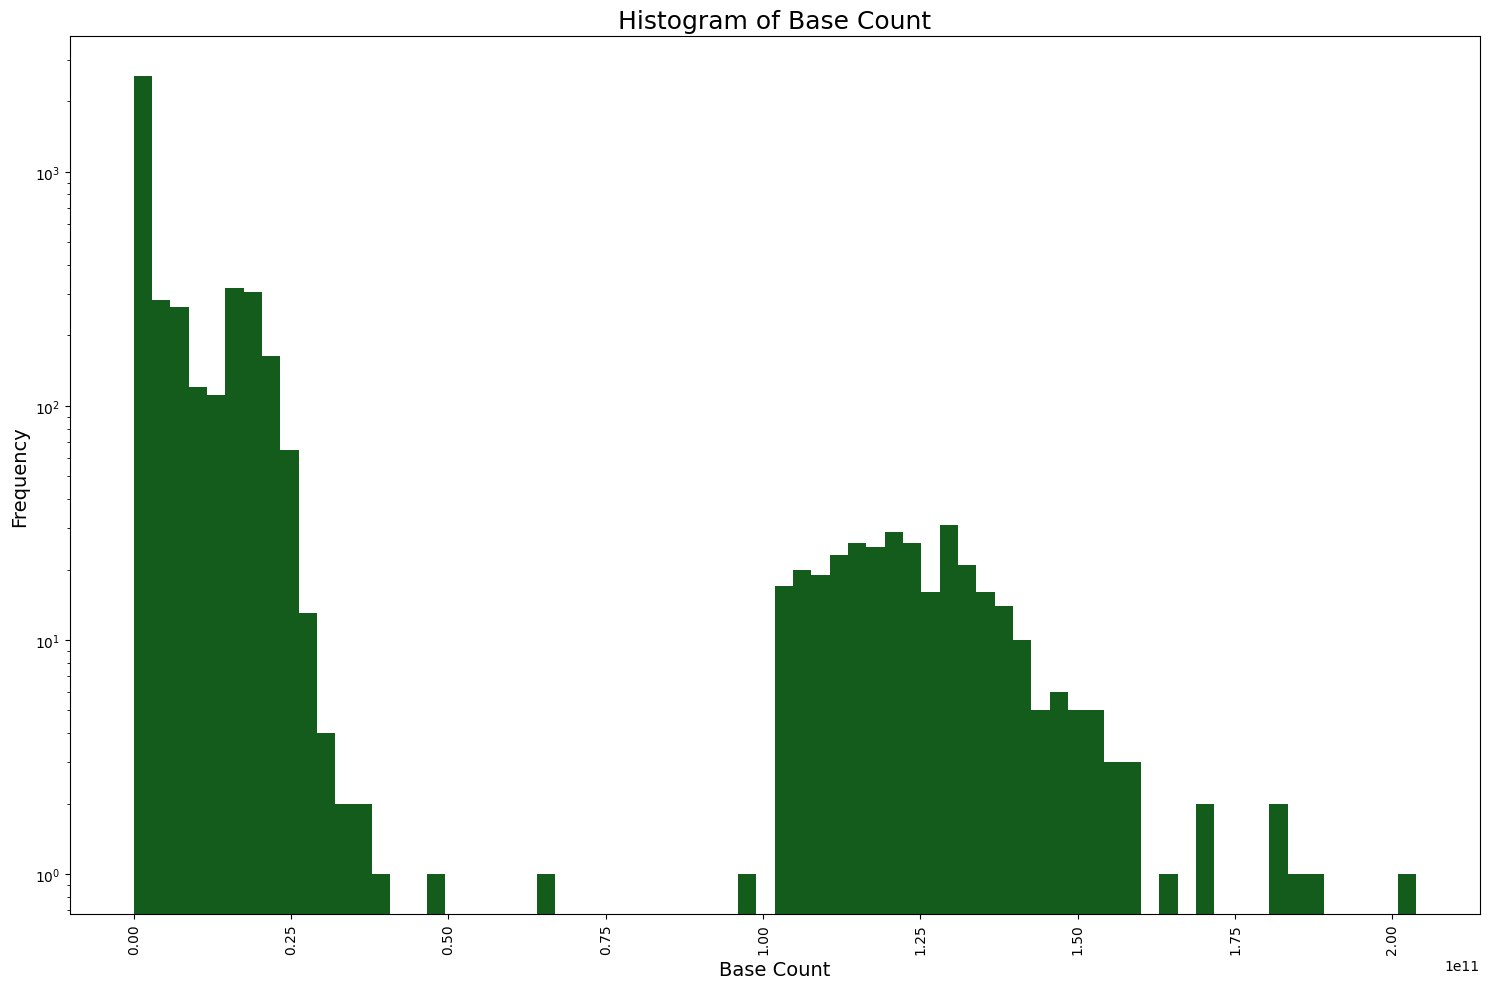

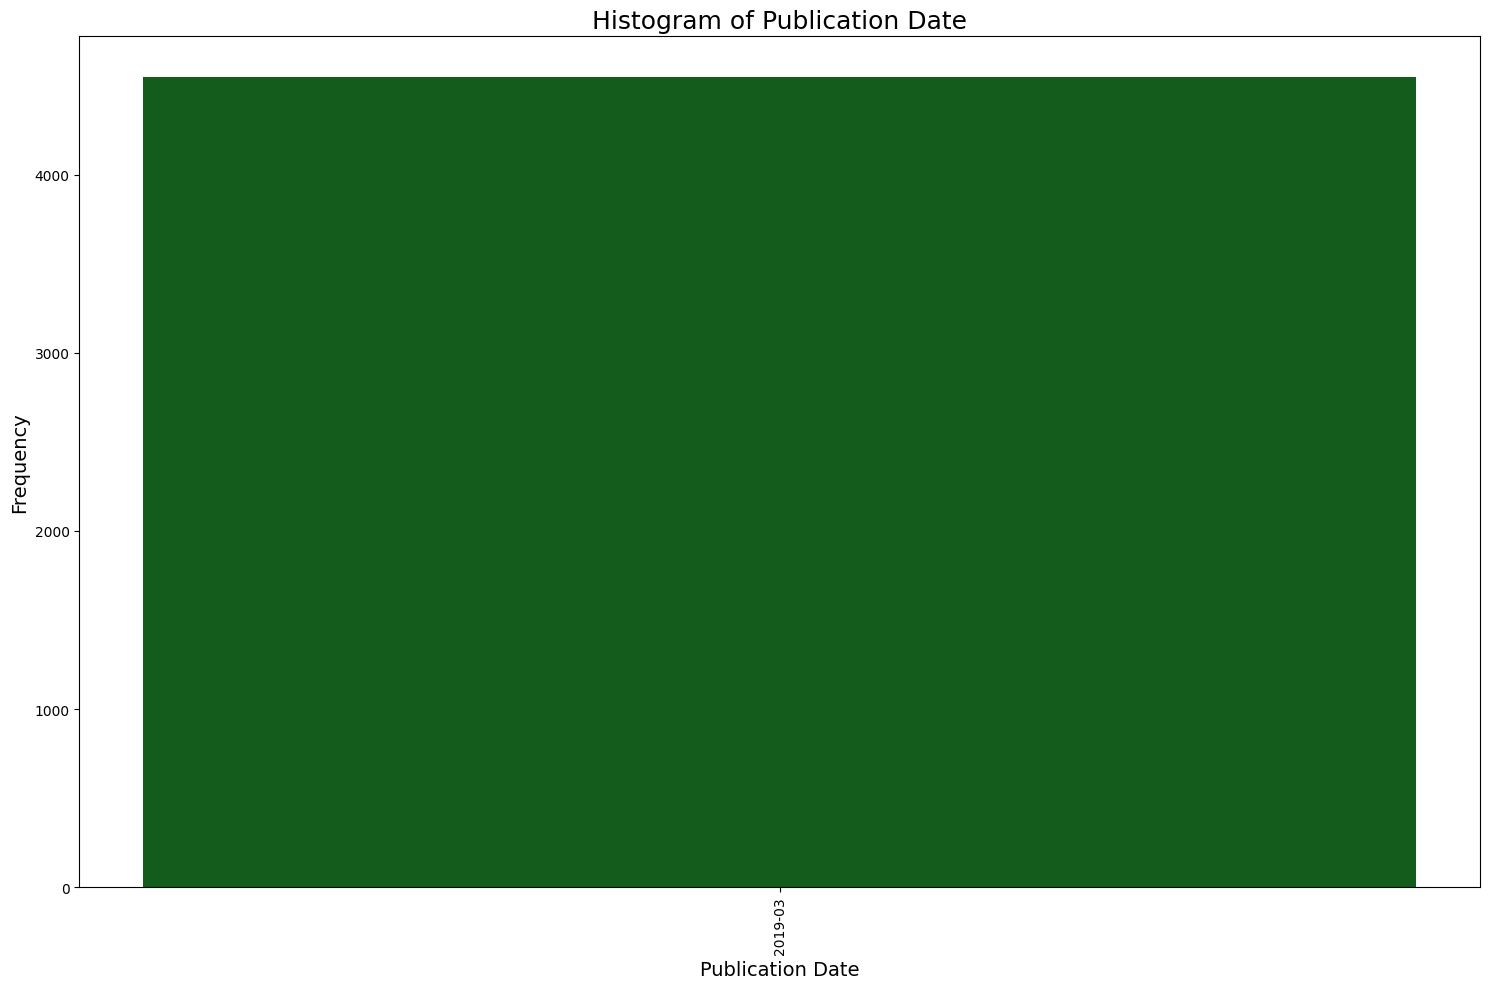

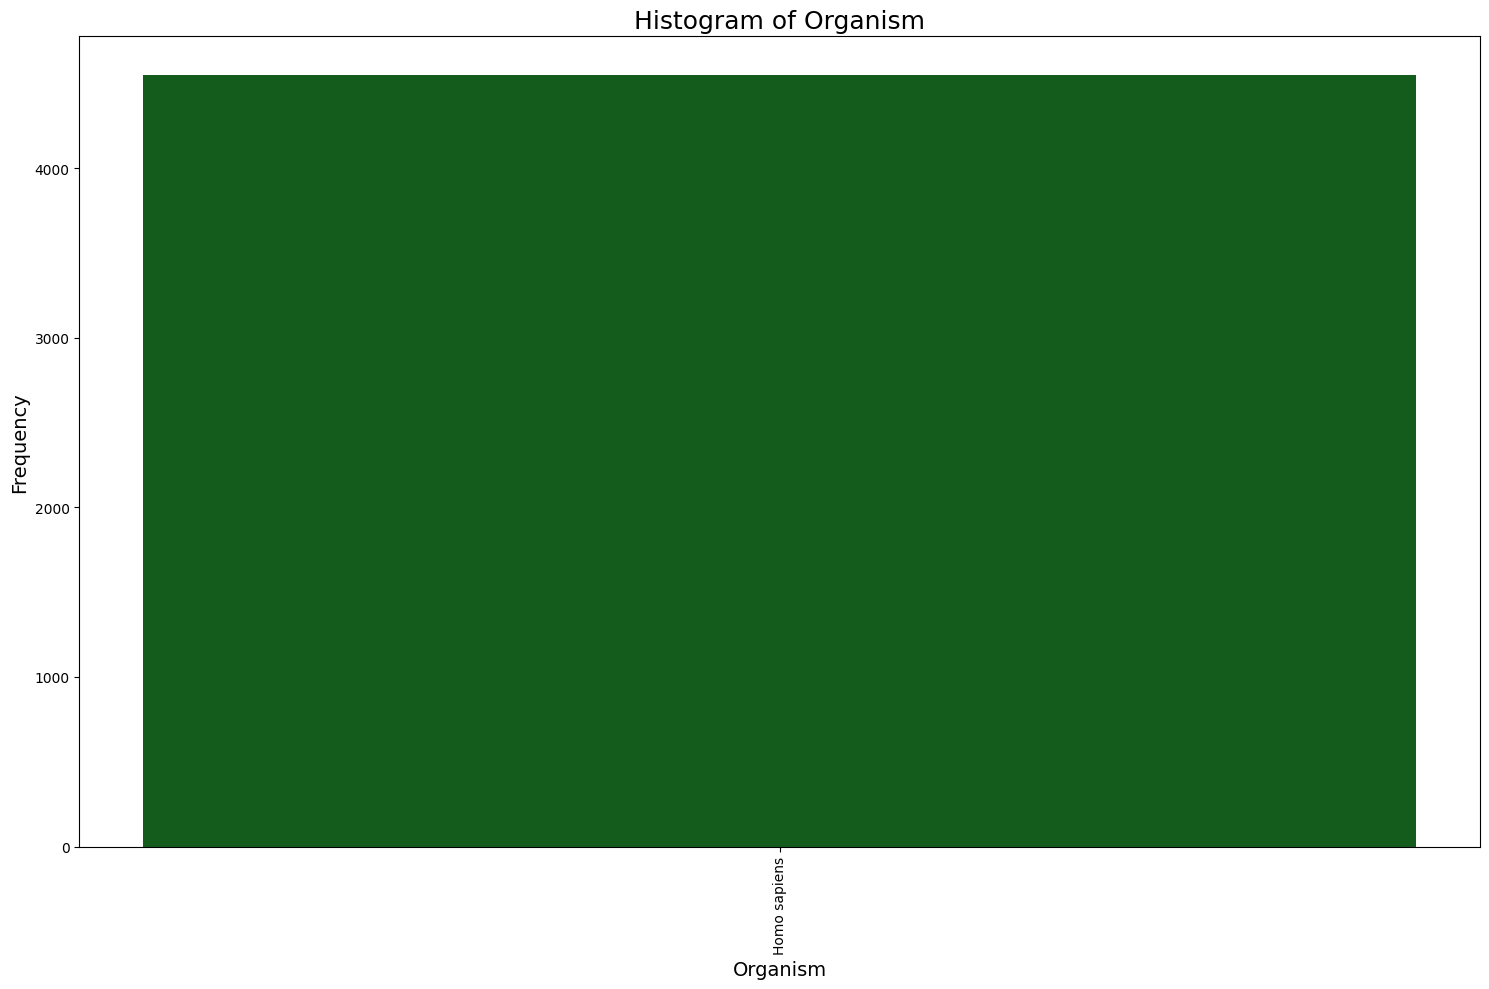

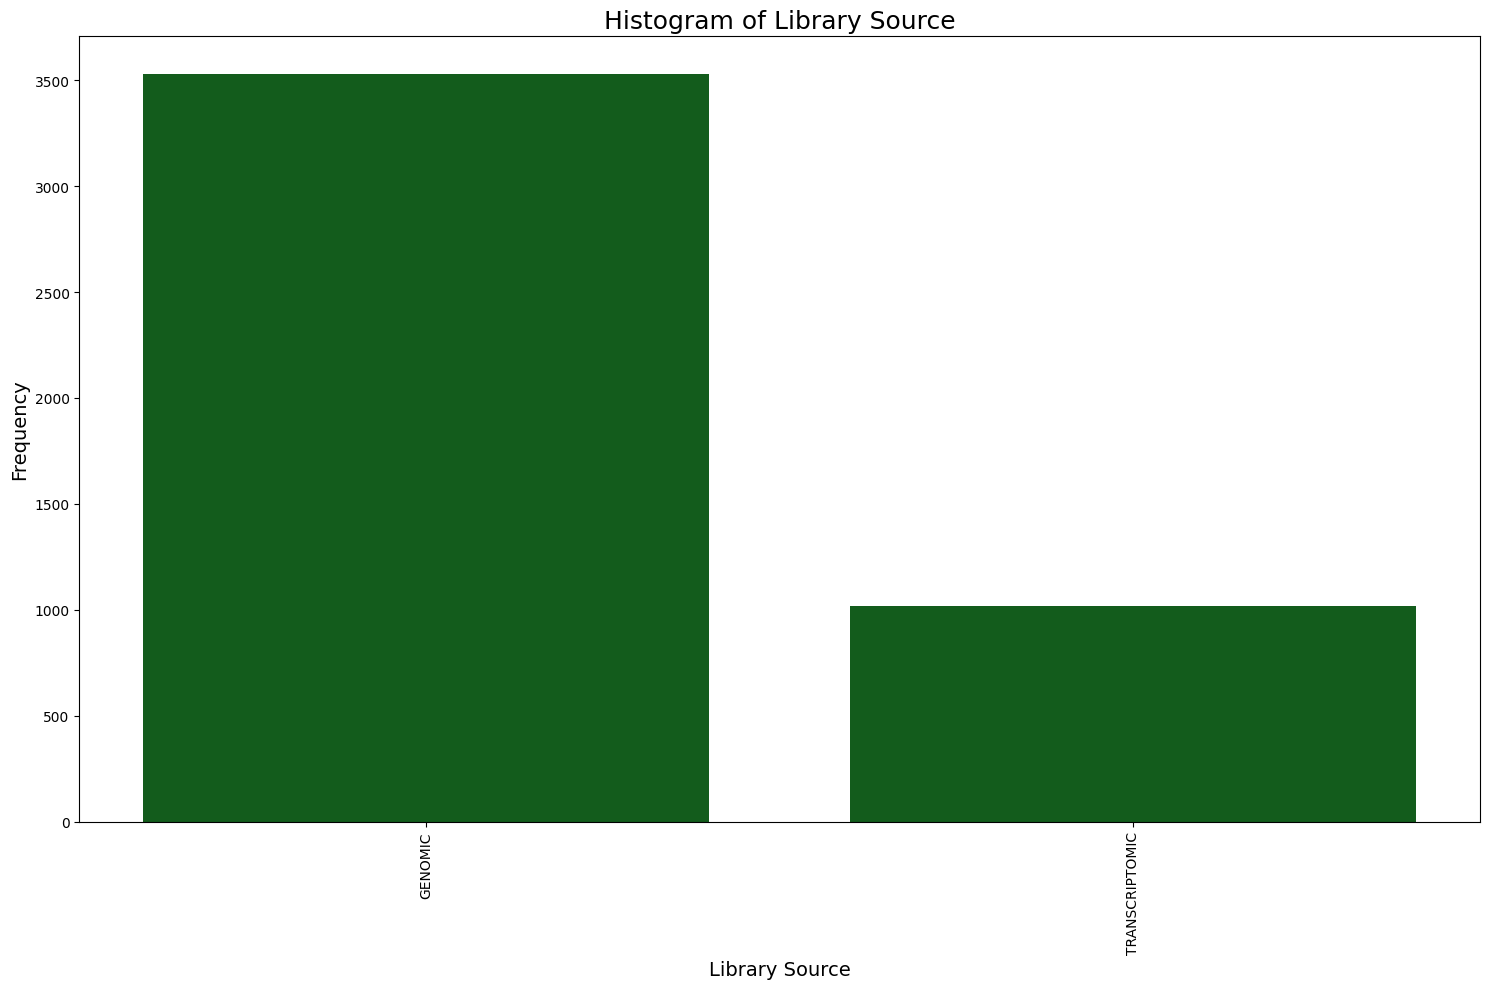

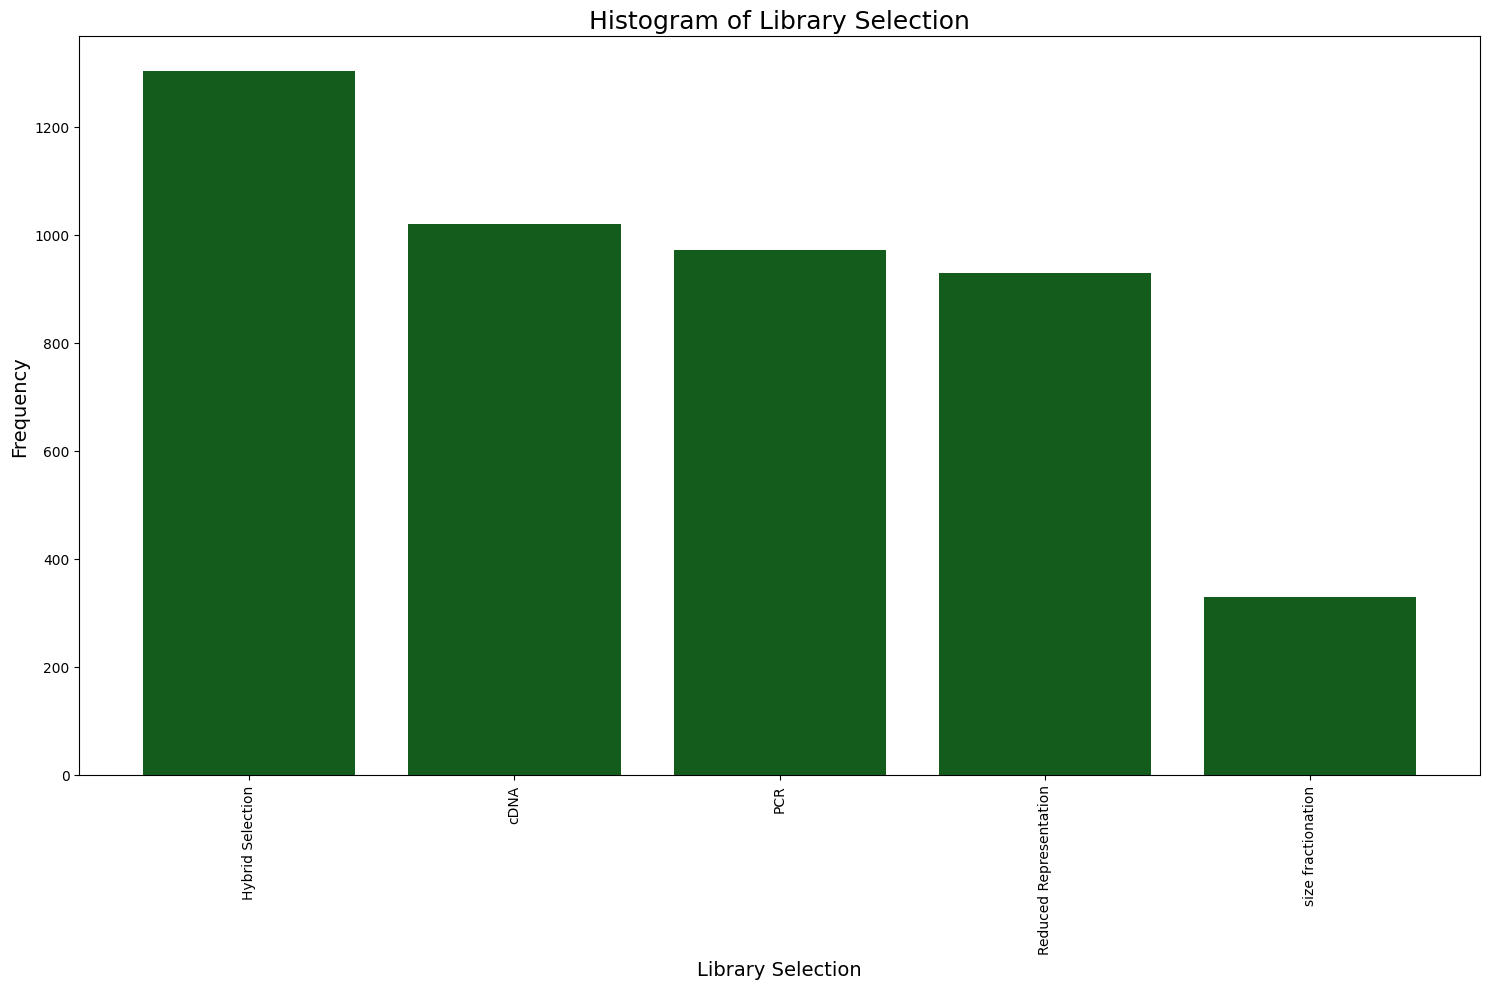

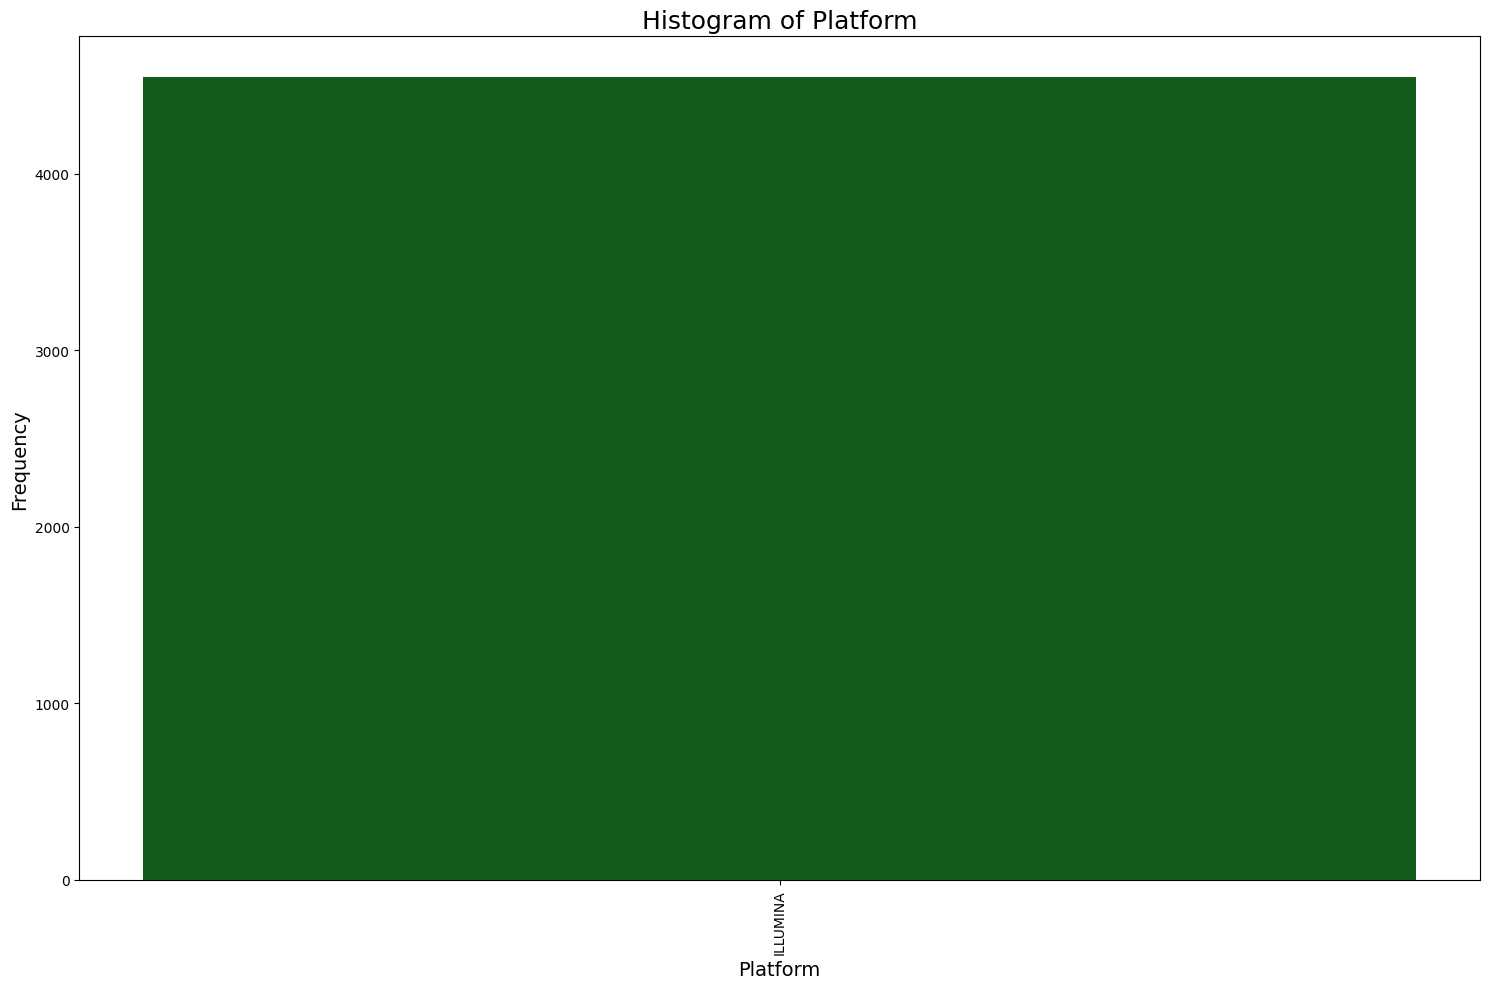

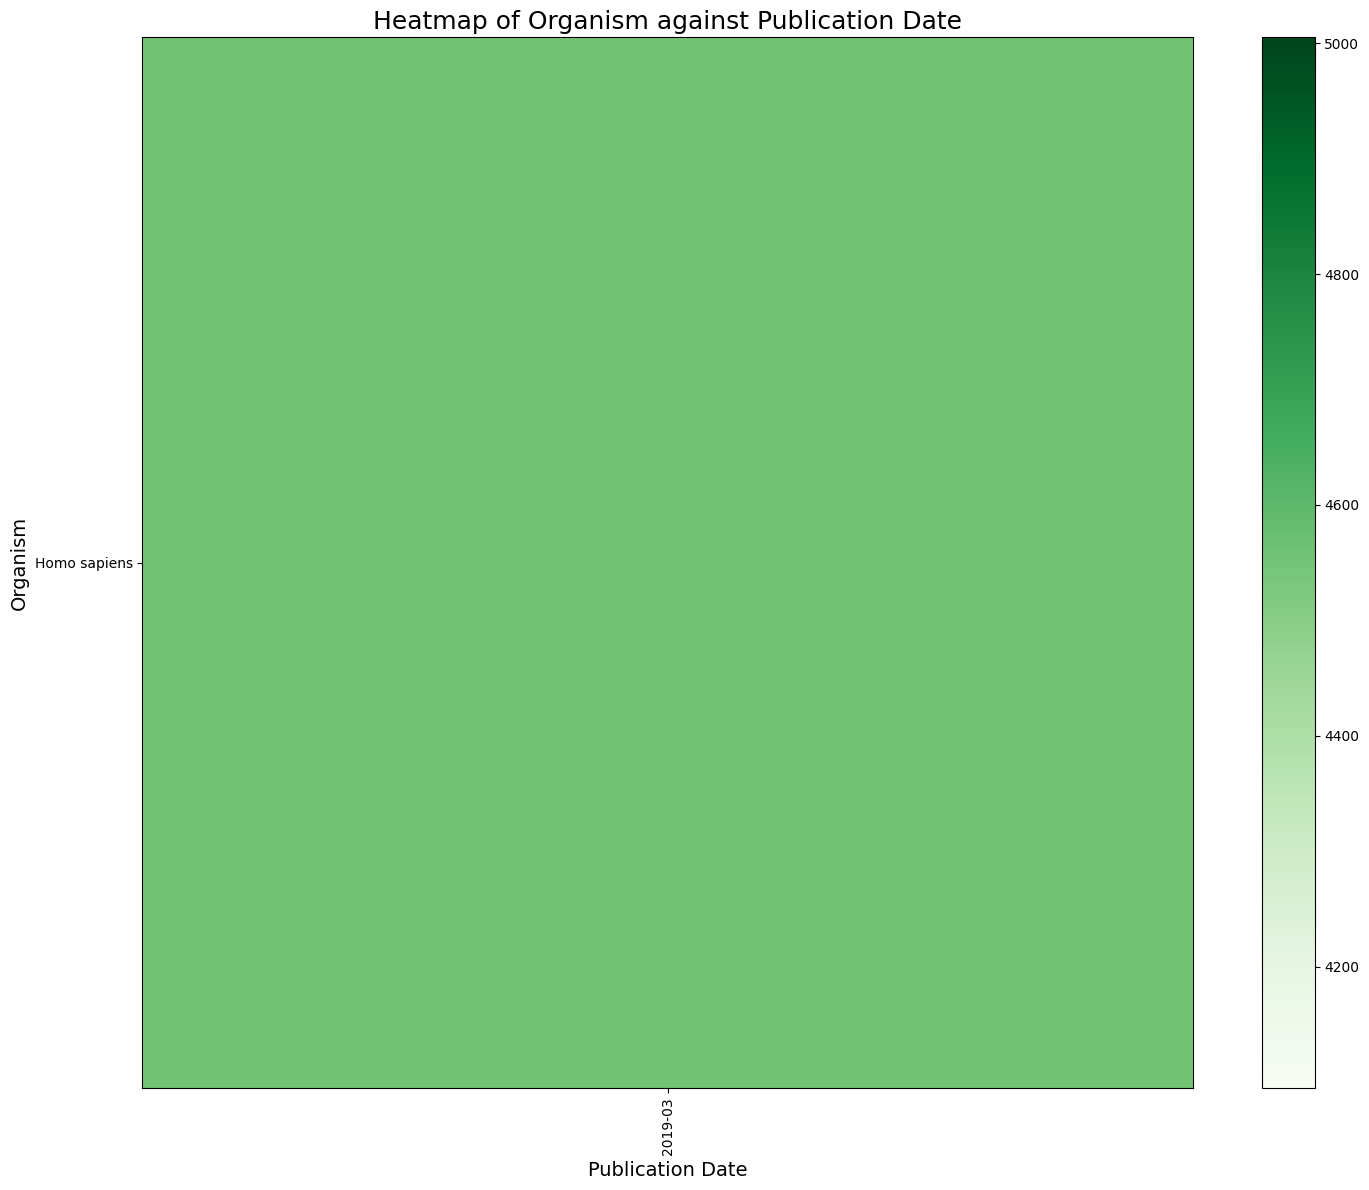

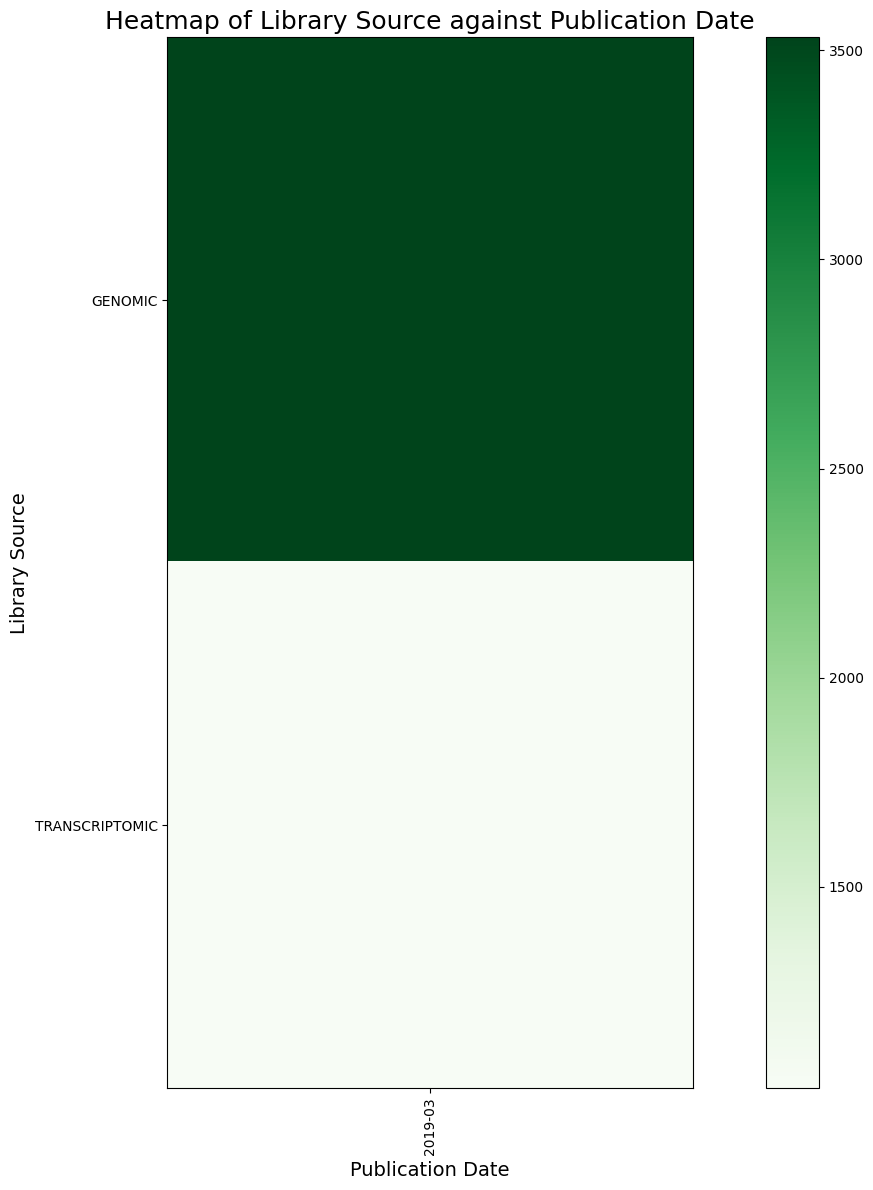

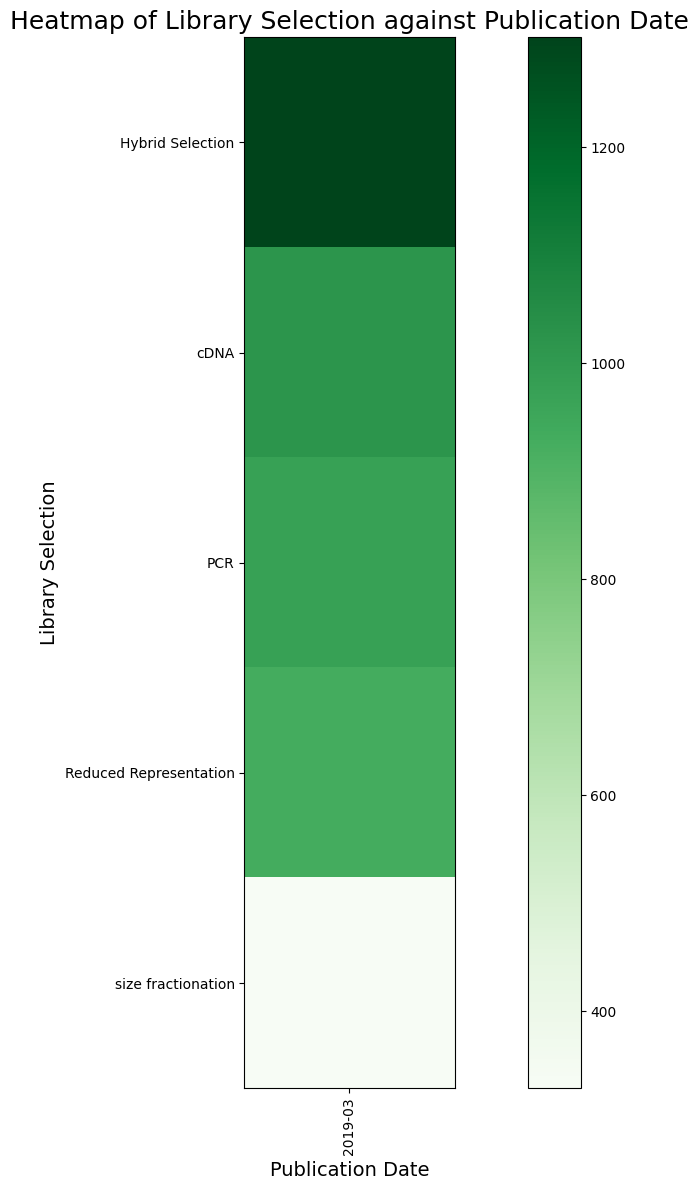

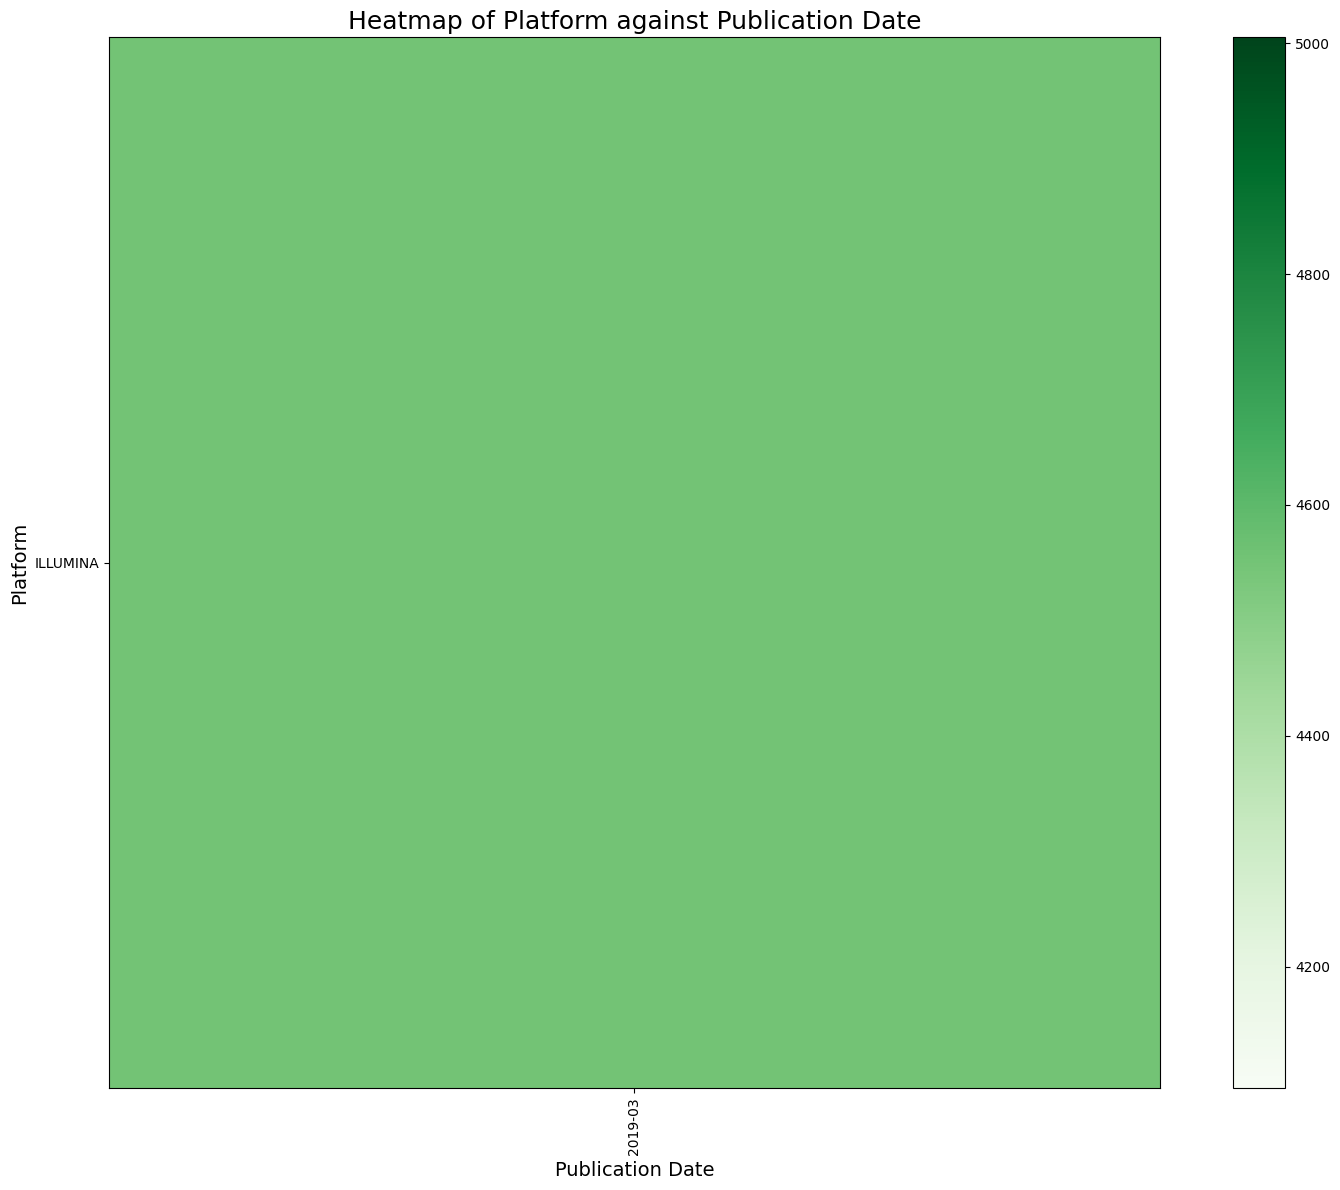

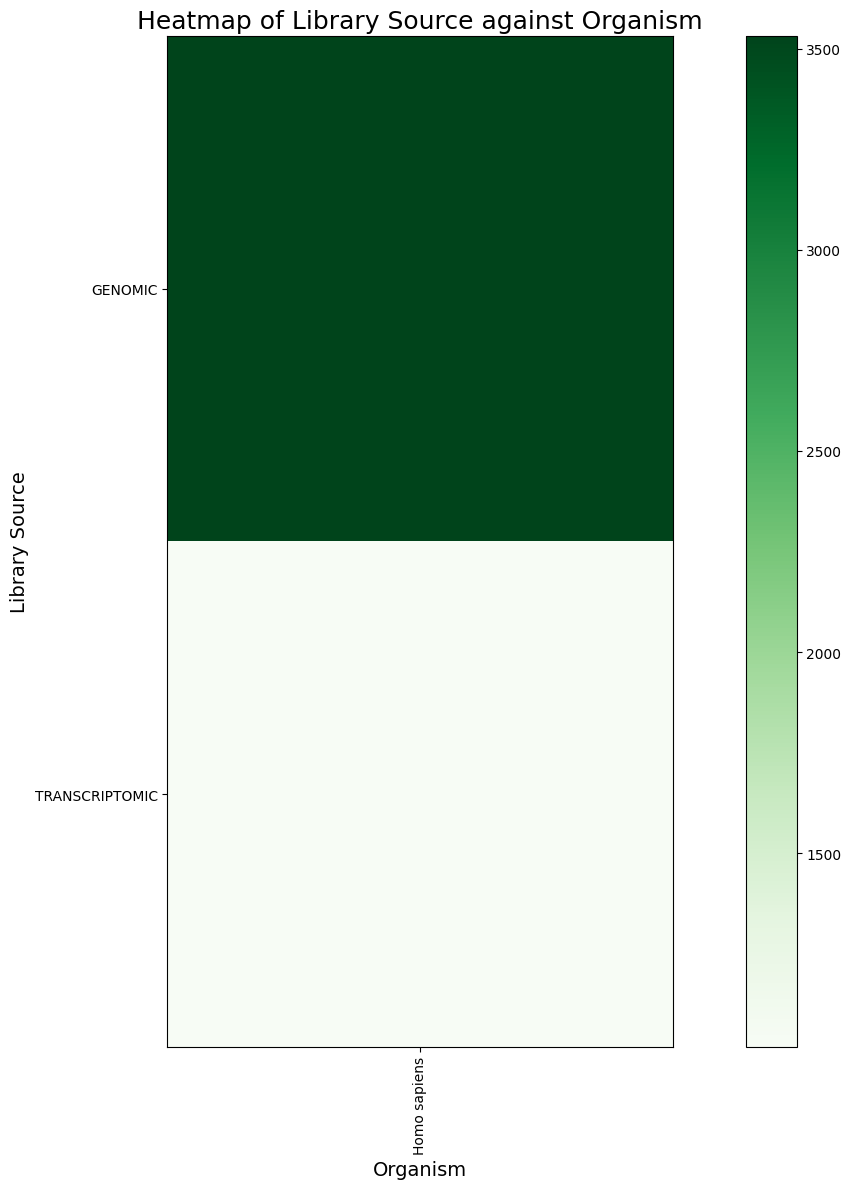

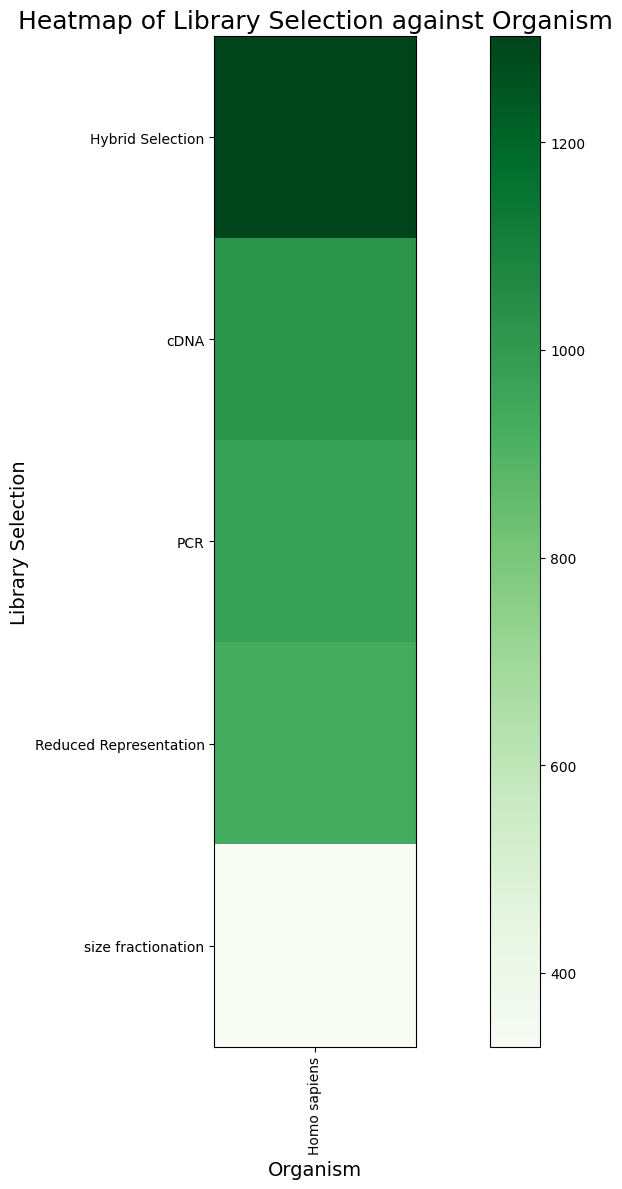

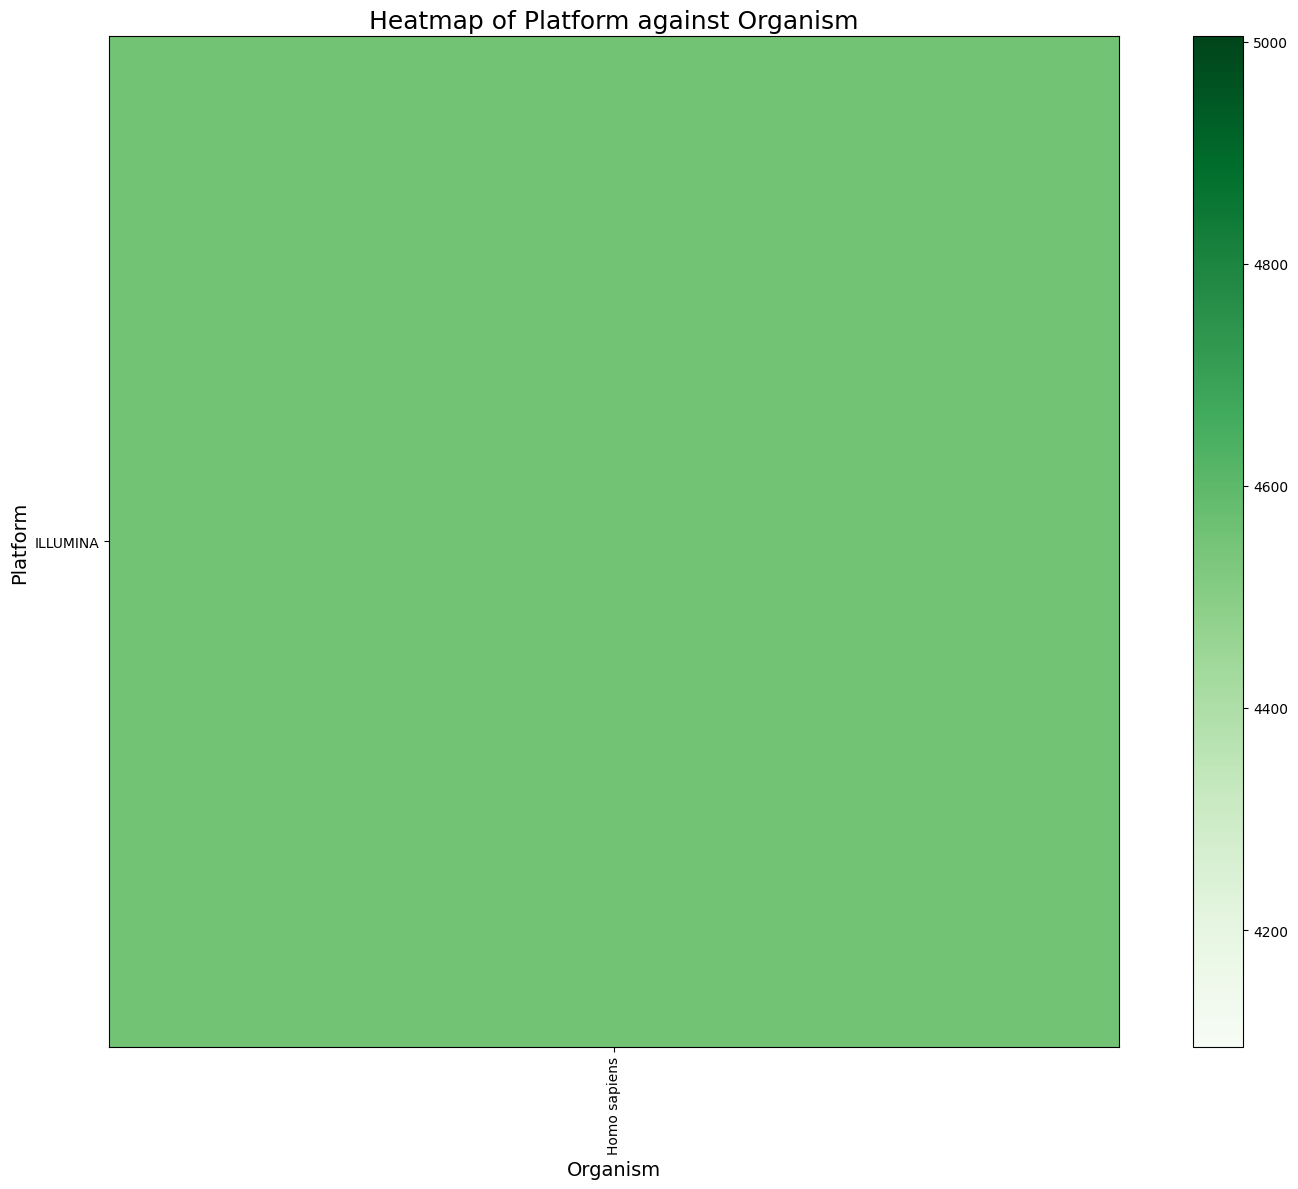

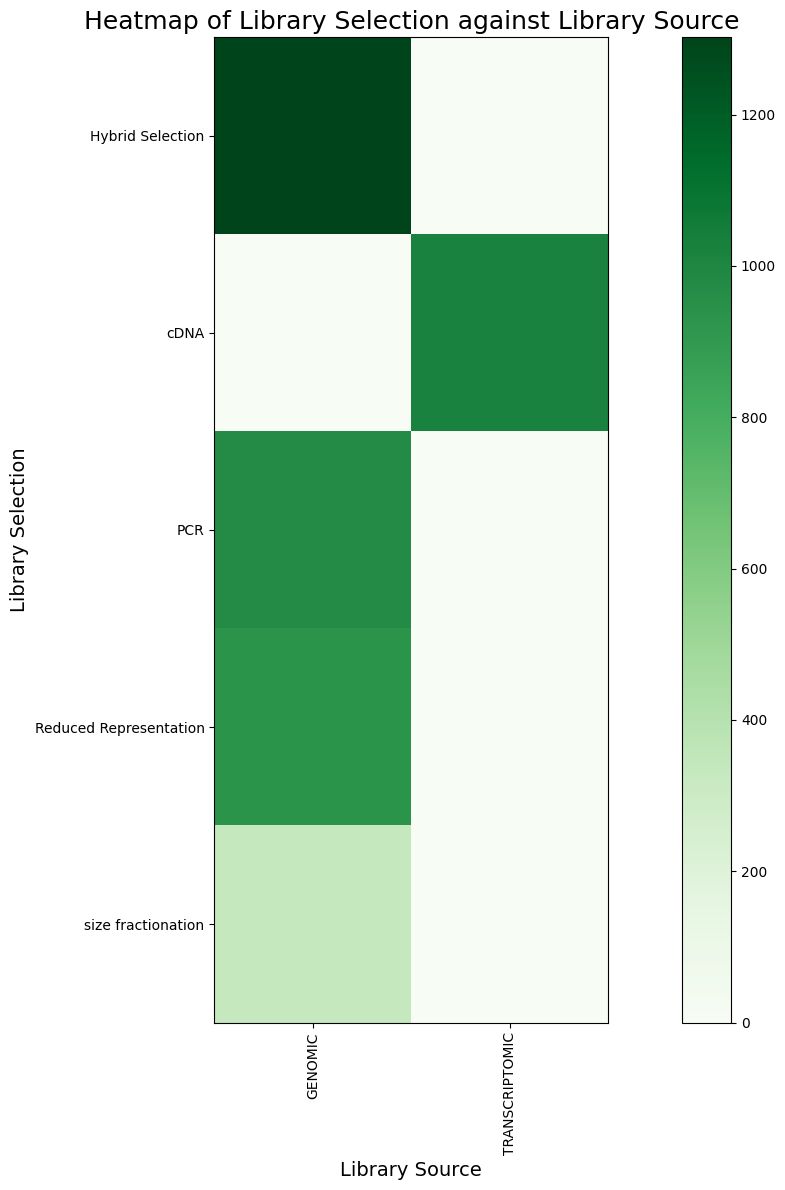

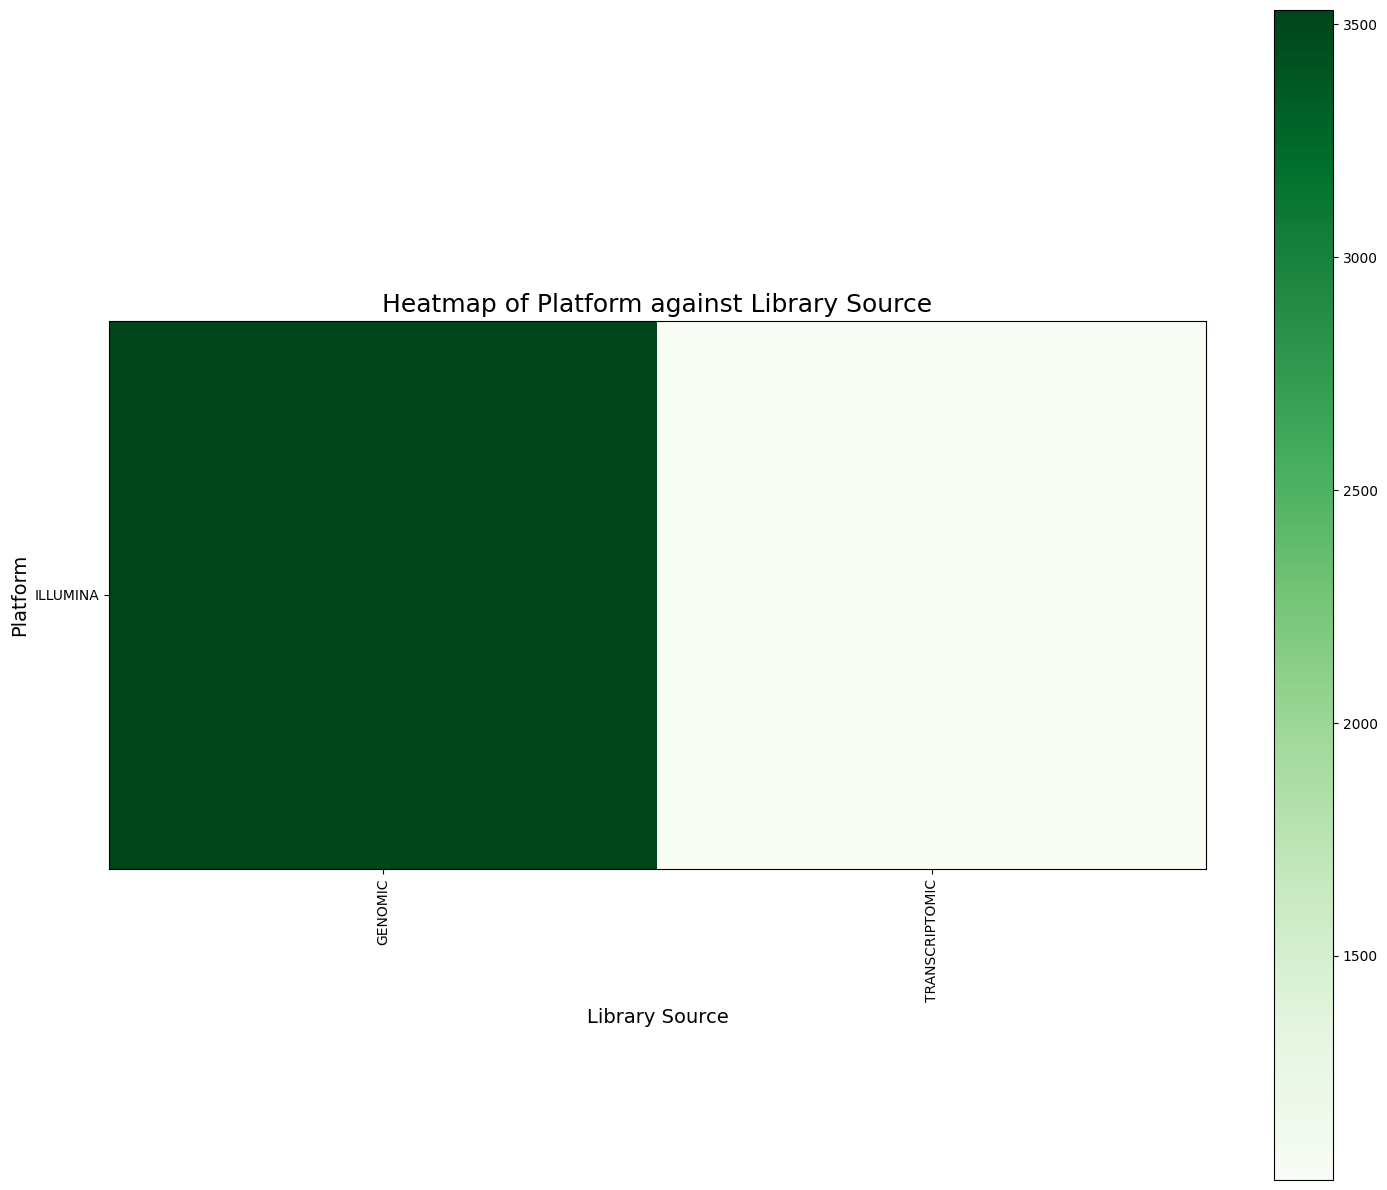

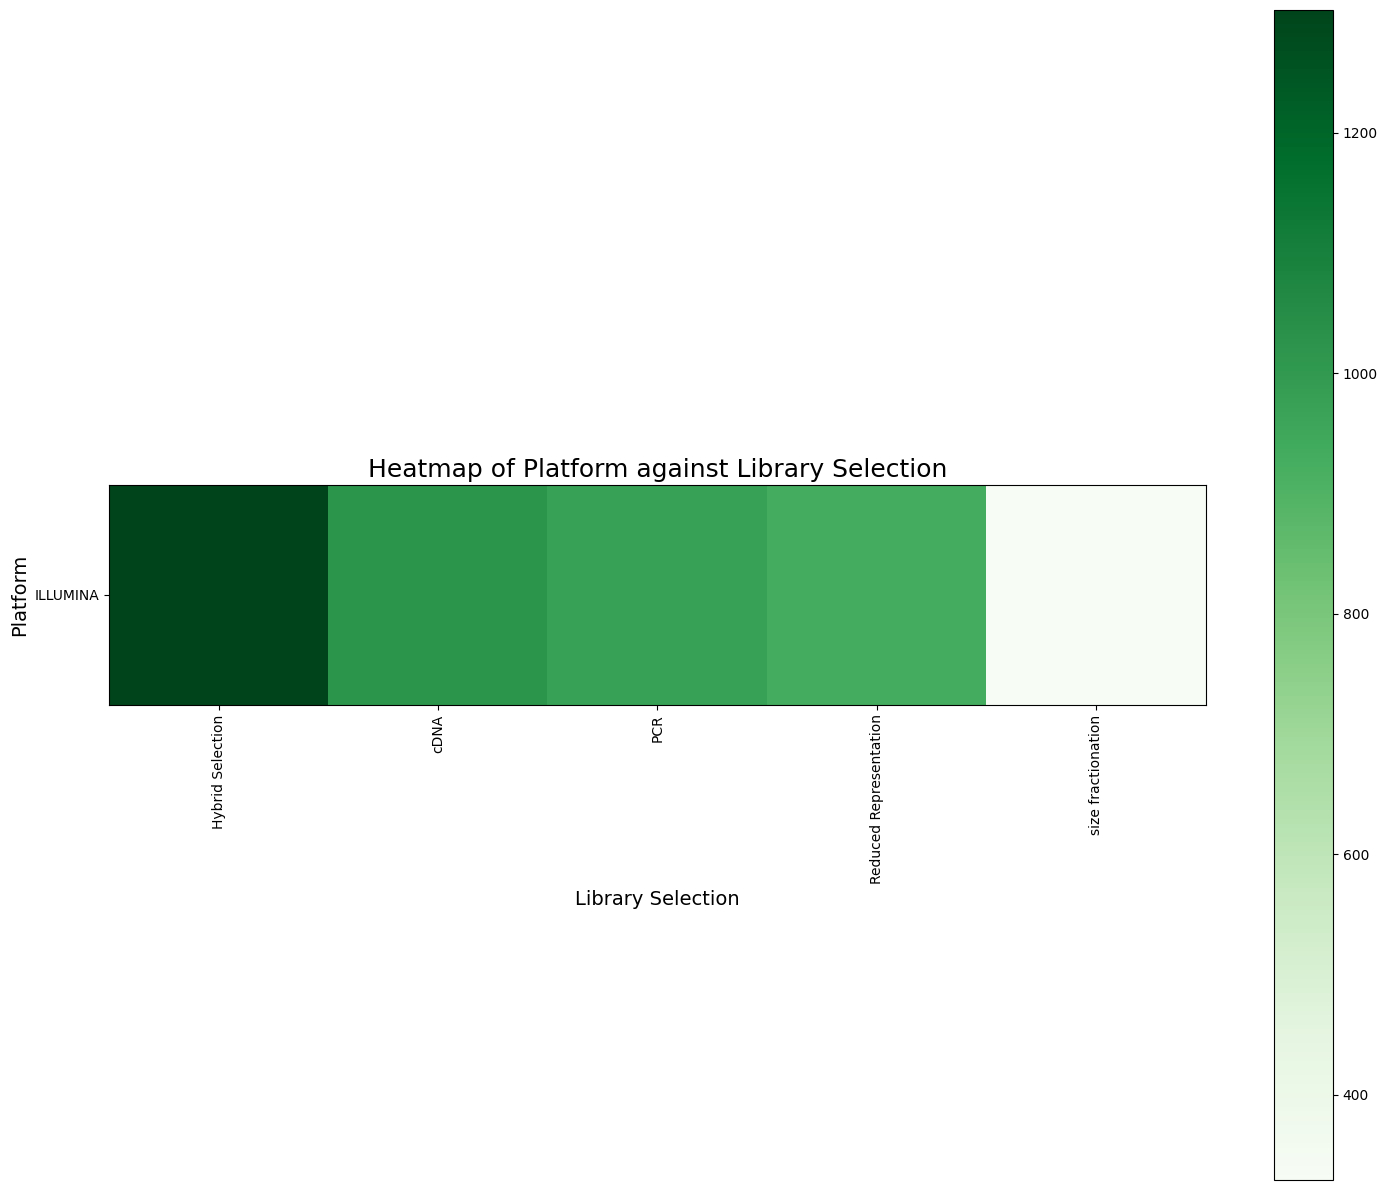

In [ ]:
# visualize here:
# also saves plots in ./
instance.visualise_results(graph_types=("all",), 
                            show=False, 
                            saveto="./search_plots/"
)

# 
# get query plots to manipulate
query_plots = instance.get_plot_objects() 

In [ ]:
source_list=['genomic', 
             'genomic single cell', 
             'metagenomic', 
             'metatranscriptomic', 
             'other', 
             'synthetic', 
             'transcriptomic', 
             'transcriptomic single cell', 
             'viral rna']
# 
source = "transcriptomic"




platform_list = ["abi solid", 
             "bgiseq", 
             "capillary", 
             "complete genomics", 
             "dnbseq", 
             "helicos", 
             "illumina", 
             "ion torrent", 
             "ls454", 
             "oxford nanopore", 
             "pacbio smrt"]

# 
platform = "illumina"

strategy_list = [
                "amplicon",
                "atac seq",
                "bisulfite seq",
                "chia pet",
                "chip",
                "chip seq",
                "clone",
                "cloneend",
                "cts",
                "dnase hypersensitivity",
                "est",
                "faire seq",
                "finishing",
                "fl cdna",
                "gbs",
                "hi c",
                "mbd seq",
                "medip seq",
                "mirna seq",
                "mnase seq",
                "mre seq",
                "ncrna seq",
                "other",
                "poolclone",
                "rad seq",
                "rip seq",
                "rna seq",
                "selex",
                "synthetic long read",
                "targeted capture",
                "tethered chromatin conformation capture",
                "tn seq",
                "validation",
                "wcs",
                "wga",
                "wgs",
                "wxs"
]

strategy = "rna seq"
